In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Numerical Calculation of the Moment of Inertia 



In [10]:
M = 0.06
L = 0.15
N = 4

dL = L/N
dM = M/N

r_start = np.array([dL/2, 0,0])

n = 0
rps = []
while n<N:
    rp = r_start+n*np.array([dL,0,0])
    print(f"The position of the {n+1}th particle is {rp}")
    rps = rps + [rp]
    n += 1

r0 = np.array([0,0,0])
I = 0


for rt in rps:
    I = I + dM*np.linalg.norm(rt-r0)**2

print("I = ", I , "kg*m^2")
I_theory = (1/3)*M*L**2
print("I_theory = ", I_theory , "kg*m^2" )

The position of the 1th particle is [0.01875 0.      0.     ]
The position of the 2th particle is [0.05625 0.      0.     ]
The position of the 3th particle is [0.09375 0.      0.     ]
The position of the 4th particle is [0.13125 0.      0.     ]
I =  0.0004429687499999999 kg*m^2
I_theory =  0.00044999999999999993 kg*m^2


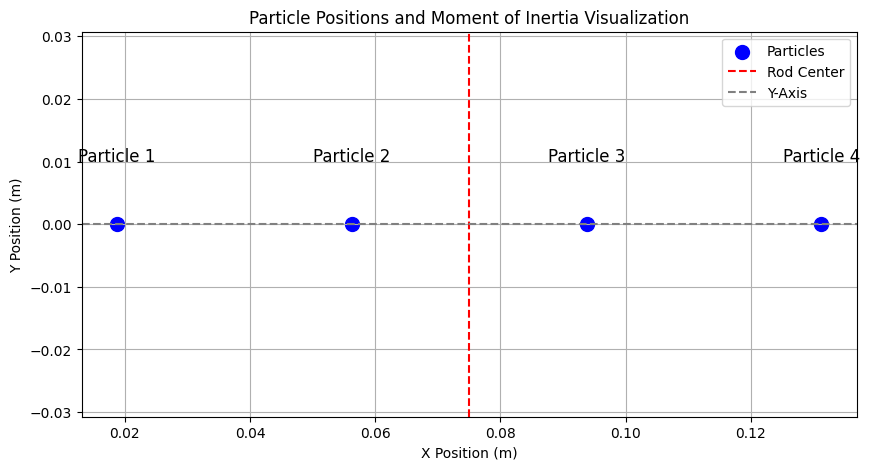

In [12]:
rps_array = np.array(rps)
# Plot particle positions
plt.figure(figsize=(10, 5))
plt.scatter(rps_array[:, 0], rps_array[:, 1], color='blue', label='Particles', s=100)

# Show the line representing the rod's length
plt.axvline(x=L/2, color='red', linestyle='--', label='Rod Center')
plt.axhline(y=0, color='gray', linestyle='--', label='Y-Axis')

# Annotate positions
for i, (x, y) in enumerate(zip(rps_array[:, 0], rps_array[:, 1])):    
    plt.text(x, y + 0.01, f'Particle {i+1}', fontsize=12, ha='center')

plt.xlim(-0.1, L + 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Particle Positions and Moment of Inertia Visualization')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

## Monte Carlo Calculation of Moment of Inertia for a Spherical Shell

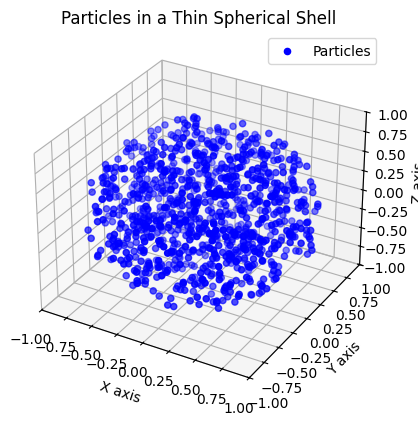

I =  393.3649729463605 kgm^2
It =  0.4 kgm^2


In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N = 1000
n = 0
R = 1  # Radius of the sphere shell
M = 1  # Mass of each particle for moment of inertia calculation

r_array = []
while n < N:
    rr = np.array([1 - 2 * np.random.random(), 1 - 2 * np.random.random(), 1 - 2 * np.random.random()])
    if np.linalg.norm(rr) < 1:
        n += 1
        r_array.append(rr)

r_array = np.array(r_array)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter the points
ax.scatter(r_array[:, 0], r_array[:, 1], r_array[:, 2], color='b', s=20, label='Particles')

# Set limits and labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Particles in a Thin Spherical Shell')
ax.legend()

plt.show()

# Calculate the moment of inertia
I = sum(M * (rt[0]**2 + rt[1]**2) for rt in r_array)
print("I = ", I, "kgm^2")  # Output the calculated moment of inertia
It = (2 / 5) * M * R**2  # Theoretical moment of inertia for a solid sphere
print("It = ", It, "kgm^2")  # Output the theoretical moment of inertia



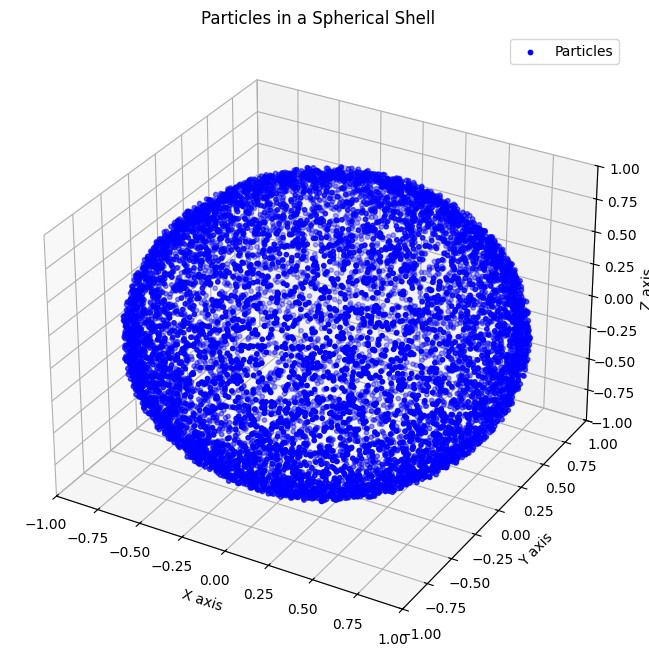

Calculated Moment of Inertia (I): 4.674193079339408 kg·m²
Theoretical Moment of Inertia (It): 4.666666666666666 kg·m²


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N = 10000    # Number of particles
R = 1       # Radius of the sphere or shell
M = 7       # Mass of each particle
dr = 0.03

# Generate particle positions on a thin spherical shell
particles = []

while len(particles) < N:
    # Generate random points within [-R, R]^3
    point = np.random.uniform(-R, R, size=3)
    if R * (1 - dr) < np.linalg.norm(point) < R * (1 + dr):  # Accept only points in the shell
        particles.append(point)

# Choose between shell or volume
r_array = np.array(particles)

# Plotting particles
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_array[:, 0], r_array[:, 1], r_array[:, 2], color='b', s=10, label='Particles')
ax.set_xlim([-R, R])
ax.set_ylim([-R, R])
ax.set_zlim([-R, R])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Particles in a Spherical Shell' if use_shell else 'Particles in a Spherical Volume')
ax.legend()
plt.show()

# Moment of inertia calculation
I = np.sum(M * (r_array[:, 0]**2 + r_array[:, 1]**2))
print("Calculated Moment of Inertia (I):", I/N, "kg·m²")

It = (2 / 3) * M * R**2  # Thin spherical shell
print("Theoretical Moment of Inertia (It):", It, "kg·m²")


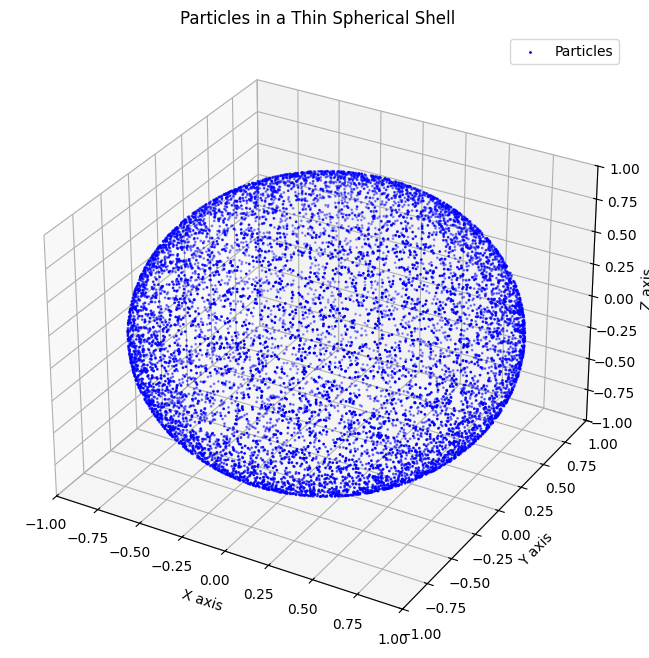

Calculated Moment of Inertia (I): 4.660735927635692 kg·m²
Theoretical Moment of Inertia (It): 4.666666666666666 kg·m²


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N = 10000  # Total number of points
R = 1      # Radius of the spherical shell
dr = 0.05  # Thickness of the shell
M = 7      # Total mass of the points
dm = M / N # Mass of each individual point

# List to store the valid points
rp = []

# Generate points within the spherical shell
while len(rp) < N:
    # Generate random point in 3D space
    rr = np.random.uniform(-1, 1, size=3)
    mag_rr = np.linalg.norm(rr)  # Magnitude of the vector
    # Check if the point lies within the spherical shell
    if R * (1 - dr) < mag_rr < R * (1 + dr):
        rp.append(rr / mag_rr * R)  # Normalize to the sphere's radius and add to list

rp = np.array(rp)  # Convert to NumPy array for further calculations

# Plotting the spherical shell
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points
ax.scatter(rp[:, 0], rp[:, 1], rp[:, 2], color='b', s=1, label='Particles')

# Set axis properties
ax.set_xlim([-R, R])
ax.set_ylim([-R, R])
ax.set_zlim([-R, R])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Particles in a Thin Spherical Shell')
ax.legend()
plt.show()

# Calculate the moment of inertia
I = np.sum(dm * (rp[:, 0]**2 + rp[:, 1]**2))
print("Calculated Moment of Inertia (I):", I, "kg·m²")

# Theoretical moment of inertia for a thin spherical shell
It = (2 / 3) * M * R**2
print("Theoretical Moment of Inertia (It):", It, "kg·m²")
